# Bibliotecas Python Utilizadas

Este código Python importa várias bibliotecas para análise de dados, visualização e estatísticas.


In [23]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import numpy as np
import random

# Funções Python Utilizadas

Este trecho de código contém várias funções Python úteis para análise estatística e manipulação de dados.

## Função `estrelaP(valor)`

Esta função determina o nível de significância (*p-value*) e atribui um símbolo de estrela com base no valor do *p-value*.

## Função `chiQuadrado(X1, X2, X3, X4, nTestes)`
Esta função calcula o teste qui-quadrado ou o teste exato de Fisher, dependendo dos valores fornecidos, e retorna os resultados do teste.

## Função `getN(string)`
Esta função extrai o valor de "n" de uma string específica.

In [74]:
def estrelaP(valor):
    # Função para atribuir uma estrela de significância com base no valor do p
    if (valor > 0.05):  # Se o valor p for maior que 0.05
        string = "ns"  # Não significativo (não estrelado)
    elif (0.01 < valor <= 0.05):  # Se o valor p estiver entre 0.01 e 0.05
        string = "*"  # Significativo a um nível de 0.05 (uma estrela)
    elif (0.001 < valor <= 0.01):  # Se o valor p estiver entre 0.001 e 0.01
        string = "**"  # Significativo a um nível de 0.01 (duas estrelas)
    elif (0.0001 < valor <= 0.001):  # Se o valor p estiver entre 0.0001 e 0.001
        string = "***"  # Significativo a um nível de 0.001 (três estrelas)
    else:  # Se o valor p for menor ou igual a 0.0001
        string = "****"  # Altamente significativo (quatro estrelas)
    return string


def chiQuadrado(X1, X2, X3, X4, nTestes):
    # Função para realizar o teste de qui-quadrado ou o teste exato de Fisher

    lista = [X1, X2, X3, X4]  # Lista dos valores observados
    obs = [
        [X1, X2],  # Tabela de contingência com as observações
        [X3, X4]
    ]

    if any(valor <= 5 for valor in lista):
        # Se algum valor na lista de observações for menor ou igual a 5,
        # usar o teste exato de Fisher

        odds_ratio, p = fisher_exact(obs)  # Calcula a razão de chances e o valor p
        pCorrigido = p * (nTestes - 1)  # Corrige o valor p para múltiplos testes
        sig = estrelaP(pCorrigido)  # Atribui uma estrela de significância

        # Retorna os resultados do teste
        return {'odds_ratio': odds_ratio, 'p-value': p, 'p-value-corr': pCorrigido, 'sig': sig}

    # Se nenhum valor na lista for menor ou igual a 5, usar o teste de qui-quadrado
    chi2, p, _, _ = chi2_contingency(obs)  # Calcula qui-quadrado e valor p
    pCorrigido = p * (nTestes - 1)  # Corrige o valor p para múltiplos testes
    sig = estrelaP(pCorrigido)  # Atribui uma estrela de significância

    # Retorna os resultados do teste
    return {'chi2': chi2, 'p-value': p, 'p-value-corr': pCorrigido, 'sig': sig}


def getN(string):
    # Função para extrair o número de uma string formatada

    n = int(string.split(" ")[-1].strip("(").strip(")"))  # Extrai o número da string
    return n


# Geração de Dados Pseudorrandômicos

Este trecho de código gera dados pseudorrandômicos para simulação de experimentos ou estudos.

1. **Definição do Número de Amostras por Grupo:**
   - Define o número de amostras por grupo como 20.

2. **Definição da Semente para Reprodutibilidade:**
   - Define a semente para garantir a reprodutibilidade dos valores gerados.

3. **Geração de Dados para Cada Grupo:**
   - Utiliza a distribuição de Poisson para gerar dados aleatórios para cada grupo.
   - Os parâmetros lambda para cada grupo são 20, 13, 3 e 4, respectivamente.


In [97]:
# Gerar dados pseudorandômicos

# Definindo o número de amostras por grupo
n = 15

# Definindo a semente para tornar os valores reprodutíveis
np.random.seed(42)

# Gerando dados para cada grupo
df = pd.DataFrame({
    'Tratamento': range(1, n+1),  # Cria uma coluna de tratamento com valores de 1 a n
    'Grupo 1': np.random.poisson(lam=20, size=n),  # Gera dados aleatórios seguindo uma distribuição de Poisson com lambda 20
    'Grupo 2': np.random.poisson(lam=13, size=n),  # Gera dados aleatórios seguindo uma distribuição de Poisson com lambda 13
    'Grupo 3': np.random.poisson(lam=3, size=n),   # Gera dados aleatórios seguindo uma distribuição de Poisson com lambda 3
    'Grupo 4': np.random.poisson(lam=4, size=n)    # Gera dados aleatórios seguindo uma distribuição de Poisson com lambda 4
})





# Parâmetros Configuráveis

Aqui estão os parâmetros que podem ser configurados pelo usuário para ajustar a análise:

- `lista_grupos`: Lista dos grupos a serem comparados no heatmap.
- `grupo_referencia`: Grupo de referência para comparação no heatmap.
- `diferenca_minima`: Diferença mínima aceitável entre o grupo de referência e a média do valor do tratamento para os demais grupos.
- `dic_grupos_total`: Dicionário contendo o número total de indivíduos em cada grupo (em uma aplicação real, o usuário deve informar o valor total amostral de cada grupo).


In [98]:
lista_grupos = ['Grupo 1', 'Grupo 2','Grupo 3','Grupo 4']
# Definir o grupo de referência para comparação no heatmap
grupo_referencia = 'Grupo 1'

# Diferença mínima entre o grupo referência e a média do valor do tratamento para todos os grupos
diferenca_minima = 0

# Definindo a semente para geração de números aleatórios
random.seed(42)

# Gerando um dicionário com o número total de indivíduos em cada grupo
# Numa aplicação real, o usuário deve informar o valor total amostral de cada grupo
dic_grupos_total = {
    "Grupo 1": random.randint(30, 35),  # Gera um número inteiro aleatório entre 30 e 35 para o Grupo 1
    "Grupo 2": random.randint(30, 35),  # Gera um número inteiro aleatório entre 30 e 35 para o Grupo 2
    "Grupo 3": random.randint(30, 35),  # Gera um número inteiro aleatório entre 30 e 35 para o Grupo 3
    "Grupo 4": random.randint(30, 35)   # Gera um número inteiro aleatório entre 30 e 35 para o Grupo 4
}

# Pré-processamento dos Dados

Este trecho de código executa o pré-processamento dos dados para prepará-los para a visualização em um heatmap.

1. **Iteração sobre os Grupos:**
   - Itera sobre os grupos presentes na lista de grupos.
   - Normaliza os dados para cada grupo em relação ao número total de indivíduos no grupo.
   - Arredonda os valores normalizados para duas casas decimais.

2. **Criação do DataFrame Pivotado:**
   - Utiliza a função `pd.pivot_table` para criar um DataFrame pivotado a partir dos dados normalizados.
   - Define os valores a serem utilizados como valores para o heatmap como os grupos presentes na lista de grupos.
   - Define os tratamentos como colunas do DataFrame.

3. **Atualização dos Índices:**
   - Cria uma nova lista de índices que inclui a contagem total de indivíduos em cada grupo entre parênteses.
   - Atribui essa nova lista de índices ao índice do DataFrame pivotado.


In [99]:
# Iterar sobre os grupos na lista de grupos
for grupo in lista_grupos:
    # Normalizar os dados para cada grupo em relação ao número total de indivíduos no grupo
    df[grupo] = round((df[grupo] / dic_grupos_total[grupo]) * 100, 2)

# Criar um DataFrame pivotado para visualização em um heatmap
df_heatmap = pd.pivot_table(df, values=lista_grupos, columns=['Tratamento'])

# Criar uma nova lista de índices com a contagem total de indivíduos em cada grupo
novo_index = [f'{index} ({dic_grupos_total[index]})' for index in df_heatmap.index]

# Atribuir a nova lista de índices ao DataFrame pivotado
df_heatmap.index = novo_index


# Análise e Visualização dos Dados

Este trecho de código realiza a análise e visualização dos dados preparados anteriormente para plotagem em um heatmap.

1. **Iteração sobre os Índices do DataFrame Pivotado:**
   - Itera sobre os índices do DataFrame pivotado para encontrar o índice específico que corresponde ao grupo de referência.

2. **Filtragem das Colunas:**
   - Calcula a média das outras linhas excluindo o índice específico para cada coluna.
   - Calcula a diferença absoluta entre o valor do índice específico e a média.
   - Filtra as colunas que atendem ao critério definido pela variável `diferenca_minima`.

3. **Criação do DataFrame Filtrado:**
   - Cria um novo DataFrame contendo apenas as colunas filtradas.

4. **Cálculo dos Valores de p:**
   - Para cada coluna do DataFrame filtrado, calcula os valores de p e atribui a estrela de significância.
   - Os valores de p são armazenados em um DataFrame separado.

5. **Visualização em Heatmap:**
   - Cria uma figura e eixos para o heatmap.
   - Gera o heatmap com seaborn, adicionando valores de p como texto nas células.
   - Salva a figura como imagem.

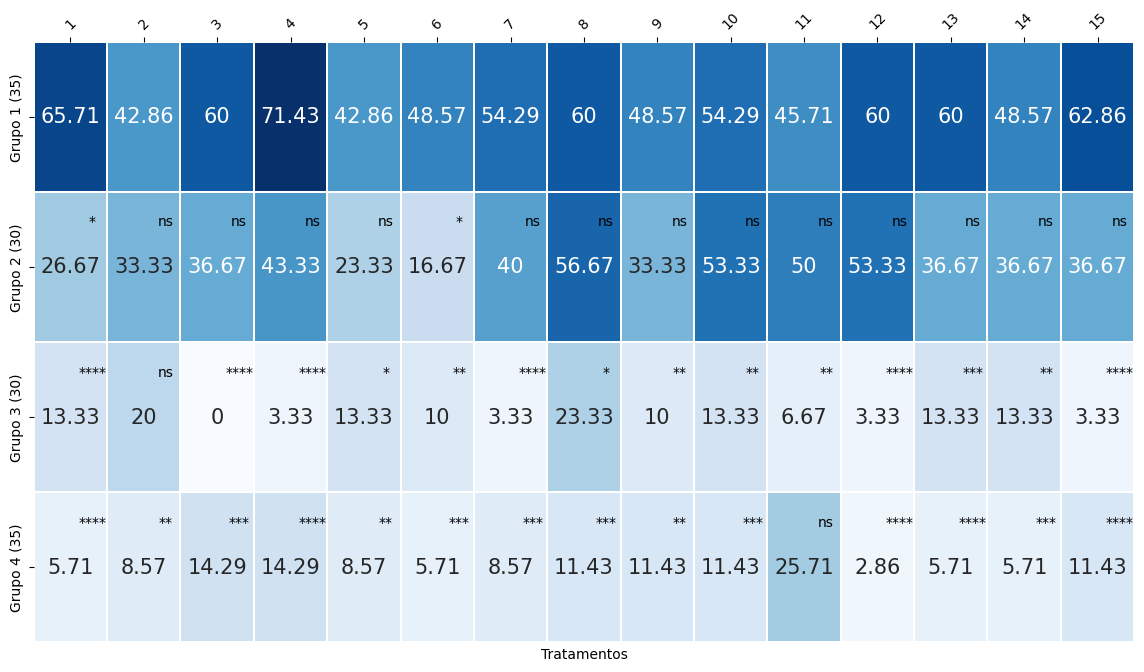

In [100]:
# Iterar sobre os índices do DataFrame pivotado
for i in df_heatmap.index:
    if grupo_referencia in i:
        indice_especifico = i  # Encontrar o índice específico que corresponde ao grupo de referência

# Lista para armazenar as colunas que serão mantidas após o filtro
colunas_para_manter = []

# Iterar sobre as colunas do DataFrame pivotado
for coluna in df_heatmap.columns:
    # Calcular a média das outras linhas excluindo o índice específico
    media = df_heatmap.loc[df_heatmap.index != indice_especifico, coluna].mean()

    # Calcular a diferença absoluta entre o valor do índice específico e a média
    diferenca_absoluta = abs(df_heatmap.at[indice_especifico, coluna] - media)

    # Verificar se a diferença absoluta atende ao critério definido pela variável diferenca_minima
    if diferenca_absoluta > diferenca_minima:
        colunas_para_manter.append(coluna)

# Criar um novo DataFrame com as colunas filtradas
df_filtrado = df_heatmap[colunas_para_manter]

# Dicionário para armazenar os valores de p calculados
dicPvalor = {}

# Iterar sobre as colunas do DataFrame filtrado
for coluna in df_filtrado.columns:
    dicPvalor[coluna] = [""]  # Inicializar a lista de valores de p para a coluna atual
    listaContagens = []  # Lista para armazenar as contagens para cada linha
    # Iterar sobre os índices do DataFrame filtrado
    for index in df_filtrado.index:
        if grupo_referencia in index:
            nRef = getN(index)  # Obter o número total de indivíduos para o grupo de referência
            X1 = int(round(nRef * (df_filtrado[coluna][index] / 100), 0))  # Calcular o número de casos para o grupo de referência
            X2 = int(nRef - X1)  # Calcular o número de não casos para o grupo de referência
        else:
            n = getN(index)  # Obter o número total de indivíduos para outros grupos
            X3 = int(round(n * (df_filtrado[coluna][index] / 100), 0))  # Calcular o número de casos para outros grupos
            X4 = int(n - X3)  # Calcular o número de não casos para outros grupos
            listaContagens.append((index, X3, X4))  # Adicionar as contagens à lista
    # Iterar sobre as contagens calculadas
    for index, X3, X4 in listaContagens:
        # Calcular o valor de p e atribuir a estrela de significância
        resultadoTeste = chiQuadrado(X1=X1, X2=X2, X3=X3, X4=X4, nTestes=len(df_filtrado.index))
        dicPvalor[coluna].append(resultadoTeste['sig'])

# Criar um DataFrame com os valores de p
dfPvalor = pd.DataFrame(dicPvalor, index=df_filtrado.index)

# Criar uma figura e eixos para o heatmap
fig, ax = plt.subplots(figsize=(14.20, 7.80))

# Criar o heatmap com seaborn
ax = sns.heatmap(df_filtrado, ax=ax, linewidths=0.03, annot=True, annot_kws={"size": 15}, xticklabels=True, cmap='Blues', fmt='g', cbar=False)
ax.set(xlabel="Tratamentos", ylabel="")  # Adicionar rótulos aos eixos
ax.xaxis.tick_top()  # Colocar os rótulos dos eixos no topo
plt.xticks(rotation=45)  # Rotacionar os rótulos dos eixos x

# Adicionar o nível de significância como texto nas células do heatmap
for i in range(df_filtrado.shape[0]):
    for j in range(df_filtrado.shape[1]):
        if not pd.isnull(dfPvalor.iloc[i, j]):
            # Adicionar o texto na célula, ajustando a posição e cor dependendo do valor
            if df_filtrado.iloc[i, j] > 70:
                color = 'white'
            else:
                color = 'black'
            ax.text(j + 0.8, i + 0.2, dfPvalor.iloc[i, j], ha='center', va='center', color=color, fontsize=10)

# Salvar a figura como imagem
fig.savefig(f'heatmap.png', format='png', dpi=300)
